In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC 
%matplotlib inline 

In [190]:
data = load_iris()
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [191]:
# printing column names 
data.feature_names  

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [192]:
# printing class names 
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [193]:
df = pd.DataFrame(data.data , columns= data.feature_names )
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [194]:
# adding target variable i.e dependent vartiable 

df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [195]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


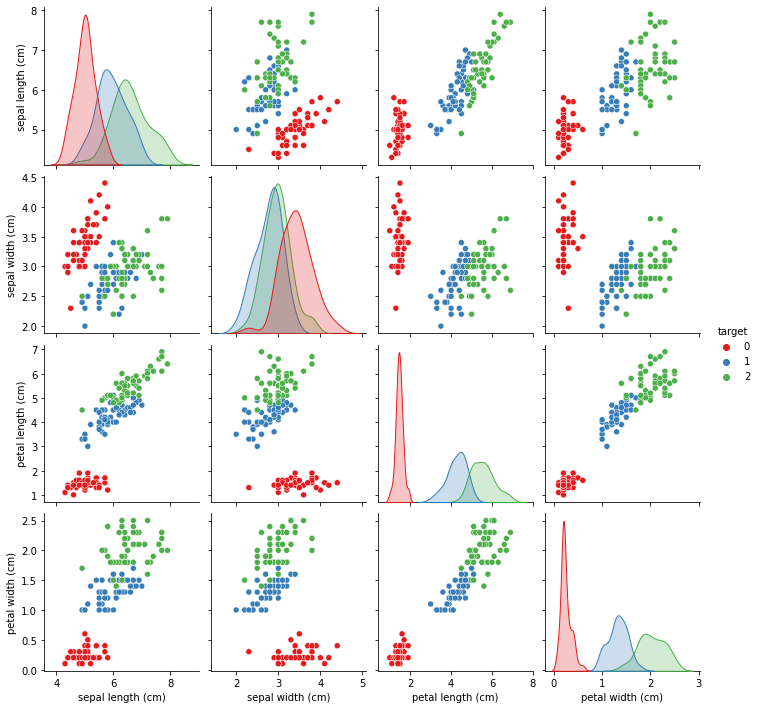

In [196]:
# visualizing
sns.pairplot(df, hue='target', palette='Set1')

In [197]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [198]:
class_names = {0:'Setosa' , 1 : 'Versicolor' , 2 : 'Virginica'}
class_names

{0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

In [199]:
# assing classnames to the target values simply replacing it 
df1 = df.copy()
df1['species'] = df['target'].map(class_names)
df1.drop('target' ,axis=1 , inplace=True)
df1.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


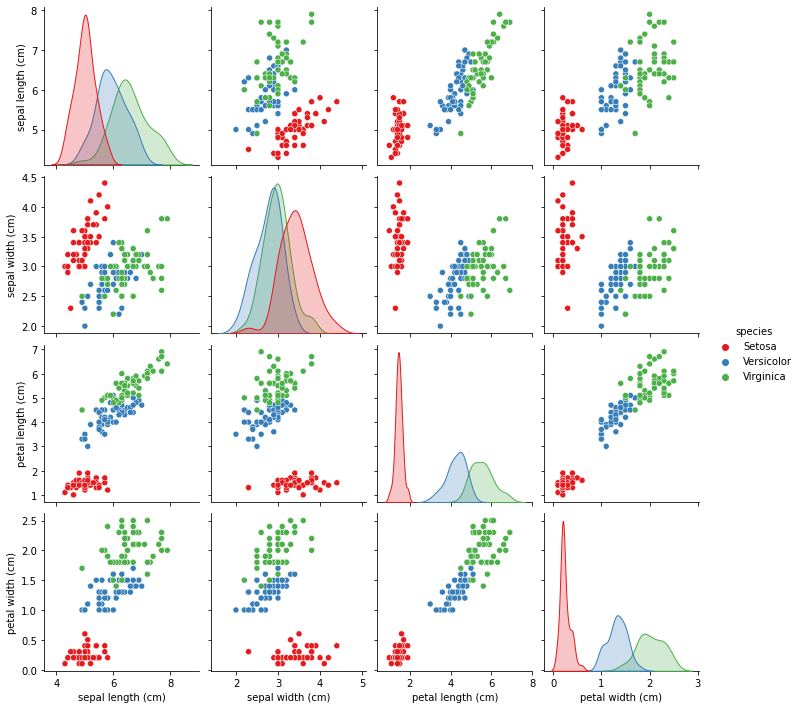

In [200]:
sns.pairplot(df1, hue= 'species' , palette='Set1')

In [201]:
X = data.data
y = data.target


In [202]:
# df.drop('species' , axis=1,inplace=True)

In [203]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [204]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the lengths of the train and test sets
print(f"x_train: {len(x_train)}")
print(f"y_train: {len(y_train)}")
print(f"x_test: {len(x_test)}")
print(f"y_test: {len(y_test)}")

x_train: 120
y_train: 120
x_test: 30
y_test: 30


In [205]:
model = SVC(C=1 , kernel='rbf')
model.fit(x_train, y_train)

SVC(C=1)

In [206]:
predictions = model.predict(x_test)

In [207]:
accuracy_score(y_test, predictions)

1.0

In [208]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

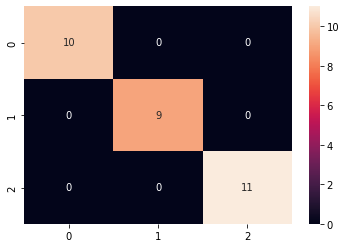

In [209]:
sns.heatmap(conf_matrix , annot=True)

In [210]:
report = classification_report(y_test,predictions,target_names= data.target_names)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [211]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = model.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: [0 1 2]


In [212]:
[class_names[i] for i in prediction]

['Setosa', 'Versicolor', 'Virginica']

In [213]:
import pickle
with open('iris_model.pickle' , 'wb') as f :
    pickle.dump(model, f)

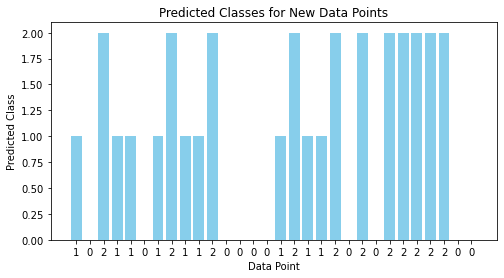

In [216]:
y_pred = model.predict(x_test)

# Map the numerical labels to class names
class_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
y_pred_names = [class_names[label] for label in y_pred]

# Create a bar chart to visualize the predictions
plt.figure(figsize=(8, 4))
plt.bar(range(len(x_test)), y_pred, tick_label=y_pred, color='skyblue')
plt.xlabel('Data Point')
plt.ylabel('Predicted Class')
plt.title('Predicted Classes for New Data Points')
plt.show()

ValueError: cannot reshape array of size 739200 into shape (440,560)